<a href="https://colab.research.google.com/github/alezab/cs-ai/blob/master/AI_03_06_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
model_1 = Sequential()
model_1.add(Input(shape=(28, 28)))
model_1.add(Flatten())

In [6]:
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

In [7]:
model_1.compile(
    optimizer=SGD(learning_rate=0.05),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
fit_1 = model_1.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8354 - loss: 0.5707 - val_accuracy: 0.9451 - val_loss: 0.1871
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9508 - loss: 0.1695 - val_accuracy: 0.9590 - val_loss: 0.1386
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9650 - loss: 0.1196 - val_accuracy: 0.9646 - val_loss: 0.1132
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9727 - loss: 0.0917 - val_accuracy: 0.9706 - val_loss: 0.0968
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9787 - loss: 0.0694 - val_accuracy: 0.9749 - val_loss: 0.0835
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9816 - loss: 0.0615 - val_accuracy: 0.9739 - val_loss: 0.0806
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9853 - loss: 0.0493 - val_accuracy: 0.9756 - val_loss: 0.0780
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9875 - loss: 0.0423 

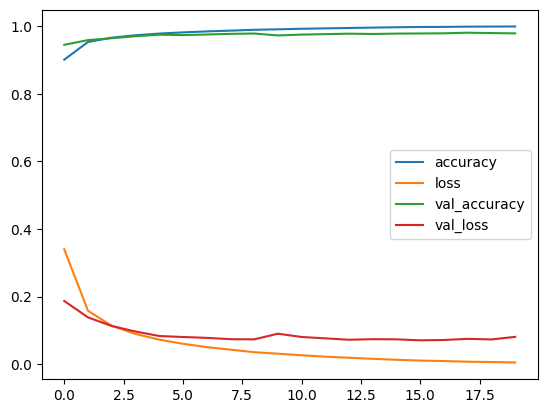

In [9]:
pd.DataFrame(fit_1.history).plot();

In [10]:
model_1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.0982


[0.08100844919681549, 0.9789000153541565]

In [11]:
model_1.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])